## Cycling Infrastructure Data

Looking deep into the cycling infrastructure

In [96]:
# import libraries

import os
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Cycle lanes

In [24]:
cycle_lane = gpd.read_file('data/cycle_lane_track.json').to_crs('EPSG:27700')

In [ ]:
cycle_lane['road_length'] = cycle_lane.length

In [88]:
cycle_lane.dtypes

FEATURE_ID       object
SVDATE           object
CLT_CARR         object
CLT_SEGREG       object
CLT_STEPP        object
CLT_PARSEG       object
CLT_SHARED       object
CLT_MANDAT       object
CLT_ADVIS        object
CLT_PRIORI       object
CLT_CONTRA       object
CLT_BIDIRE       object
CLT_CBYPAS       object
CLT_BBYPAS       object
CLT_PARKR        object
CLT_WATERR       object
CLT_PTIME        object
CLT_ACCESS       object
CLT_COLOUR       object
BOROUGH          object
PHOTO1_URL       object
PHOTO2_URL       object
geometry       geometry
road_length     float64
dtype: object

<Axes: >

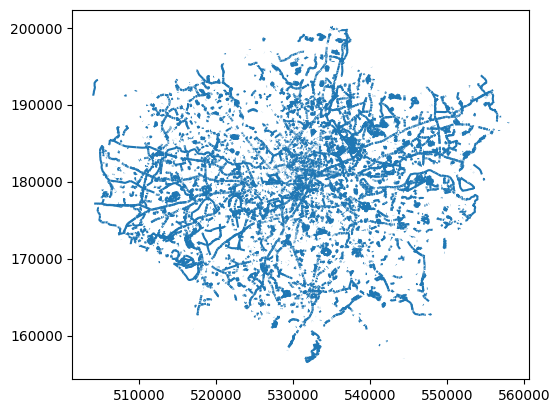

In [86]:
cycle_lane.plot()

#### Summary Statistics

Calculate the summary statistics for cycle lane

In [87]:
# summary statistics

cycle_lane.length


0         134.240613
1          85.310122
2         251.131588
3         142.592121
4          24.695457
            ...     
24971     562.460493
24972      45.089943
24973    6558.899125
24974      38.864592
24975     254.639478
Length: 24976, dtype: float64

### Points Data

The data we have from the TfL cycling infrastructure

- `cycle_parking.json`
- `restricted_point.json`
- `signage.json`
- `signal.json`
- `traffic_calming.json`



In [3]:
# load points data
cycle_parking = gpd.read_file('data/cycling_infrastructure/cycle_parking.json')
restricted_point = gpd.read_file('data/cycling_infrastructure/restricted_point.json')
signage = gpd.read_file('data/cycling_infrastructure/signage.json')
signal = gpd.read_file('data/cycling_infrastructure/signal.json')
traffic_calming = gpd.read_file('data/cycling_infrastructure/traffic_calming.json')

In [22]:
# change CRS
cycle_parking = cycle_parking.to_crs('EPSG:27700')
restricted_point = restricted_point.to_crs('EPSG:27700')
signage = signage.to_crs('EPSG:27700')
signal = signal.to_crs('EPSG:27700')
traffic_calming.to_crs('EPSG:27700')

,FEATURE_ID,SVDATE,TRF_RAISED,TRF_ENTRY,TRF_CUSHI,TRF_HUMP,TRF_SINUSO,TRF_BARIER,TRF_NAROW,TRF_CALM,BOROUGH,PHOTO1_URL,PHOTO2_URL,geometry
0,RWG001968,2017-05-29,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,Camden,https://cycleassetimages.data.tfl.gov.uk/RWG00...,https://cycleassetimages.data.tfl.gov.uk/RWG00...,POINT (526677.330 185625.668)
1,RWG001970,2017-05-29,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,Camden,https://cycleassetimages.data.tfl.gov.uk/RWG00...,https://cycleassetimages.data.tfl.gov.uk/RWG00...,POINT (526576.743 185219.837)
2,RWG001983,2017-05-30,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,Camden,https://cycleassetimages.data.tfl.gov.uk/RWG00...,https://cycleassetimages.data.tfl.gov.uk/RWG00...,POINT (526539.358 185666.257)
3,RWG001985,2017-05-30,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,Camden,https://cycleassetimages.data.tfl.gov.uk/RWG00...,https://cycleassetimages.data.tfl.gov.uk/RWG00...,POINT (526640.049 185885.435)
4,RWG002008,2017-05-30,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,Camden,https://cycleassetimages.data.tfl.gov.uk/RWG00...,https://cycleassetimages.data.tfl.gov.uk/RWG00...,POINT (528596.817 184929.750)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58560,RWG243458,2018-01-24,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,Hillingdon,https://cycleassetimages.data.tfl.gov.uk/RWG24...,https://cycleassetimages.data.tfl.gov.uk/RWG24...,POINT (505035.290 183551.795)
58561,RWG288194,2018-02-24,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,Haringey,https://cycleassetimages.data.tfl.gov.uk/RWG28...,https://cycleassetimages.data.tfl.gov.uk/no_as...,POINT (531555.947 188261.082)
58562,RWG288195,2018-02-24,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,Haringey,https://cycleassetimages.data.tfl.gov.uk/RWG28...,https://cycleassetimages.data.tfl.gov.uk/no_as...,POINT (531614.715 188269.558)
58563,RWG288196,2018-02-24,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,Haringey,https://cycleassetimages.data.tfl.gov.uk/RWG28...,https://cycleassetimages.data.tfl.gov.uk/no_as...,POINT (531662.911 188274.959)


In [8]:
signal

,FEATURE_ID,SVDATE,SIG_HEAD,SIG_SEPARA,SIG_EARLY,SIG_TWOSTG,SIG_GATE,BOROUGH,PHOTO1_URL,PHOTO2_URL,geometry
0,RWG039736,2017-08-24,TRUE,FALSE,FALSE,FALSE,FALSE,Camden,https://cycleassetimages.data.tfl.gov.uk/RWG03...,https://cycleassetimages.data.tfl.gov.uk/RWG03...,POINT (-0.17559 51.53968)
1,RWG039729,2017-07-06,TRUE,FALSE,FALSE,FALSE,FALSE,Camden,https://cycleassetimages.data.tfl.gov.uk/RWG03...,https://cycleassetimages.data.tfl.gov.uk/RWG03...,POINT (-0.17595 51.53968)
2,RWG108125,2017-06-21,TRUE,FALSE,TRUE,FALSE,FALSE,Hammersmith & Fulham,https://cycleassetimages.data.tfl.gov.uk/RWG10...,https://cycleassetimages.data.tfl.gov.uk/RWG10...,POINT (-0.22475 51.50524)
3,RWG001914,2017-05-31,TRUE,TRUE,FALSE,FALSE,FALSE,Camden,https://cycleassetimages.data.tfl.gov.uk/RWG00...,https://cycleassetimages.data.tfl.gov.uk/RWG00...,POINT (-0.15266 51.54379)
4,RWG001915,2017-05-31,TRUE,TRUE,FALSE,FALSE,FALSE,Camden,https://cycleassetimages.data.tfl.gov.uk/RWG00...,https://cycleassetimages.data.tfl.gov.uk/RWG00...,POINT (-0.14608 51.53671)
...,...,...,...,...,...,...,...,...,...,...,...
438,RWG242126,2018-01-18,TRUE,FALSE,FALSE,FALSE,FALSE,Ealing,https://cycleassetimages.data.tfl.gov.uk/RWG24...,https://cycleassetimages.data.tfl.gov.uk/RWG24...,POINT (-0.38264 51.50098)
439,RWG242123,2018-01-13,TRUE,FALSE,FALSE,FALSE,FALSE,Hillingdon,https://cycleassetimages.data.tfl.gov.uk/RWG24...,https://cycleassetimages.data.tfl.gov.uk/RWG24...,POINT (-0.41744 51.50738)
440,RWG242124,2018-01-13,TRUE,FALSE,FALSE,FALSE,FALSE,Hillingdon,https://cycleassetimages.data.tfl.gov.uk/RWG24...,https://cycleassetimages.data.tfl.gov.uk/RWG24...,POINT (-0.41488 51.50984)
441,RWG242125,2018-01-13,TRUE,FALSE,FALSE,FALSE,FALSE,Hillingdon,https://cycleassetimages.data.tfl.gov.uk/RWG24...,https://cycleassetimages.data.tfl.gov.uk/RWG24...,POINT (-0.41472 51.50980)


## Summarise by LSOA

Summarise the data by LSOA

In [17]:
# load lsoa data

lsoa = gpd.read_file('data/boundary/LSOA_2011_London_gen_MHW.shp').to_crs('EPSG:27700')
msoa = gpd.read_file('data/boundary/MSOA_2011_London_gen_MHW.shp').to_crs('EPSG:27700')

In [42]:
cycle_lane['road_length'] = cycle_lane.length

In [43]:
joined_data = msoa.sjoin(cycle_lane, predicate = 'intersects')

In [49]:
msoa_cycle_routes = pd.DataFrame(joined_data.groupby('MSOA11CD').road_length.sum())

In [50]:
msoa_cycle_routes

,road_length
MSOA11CD,
E02000001,23386.963770
E02000002,4700.725875
E02000003,10251.449600
E02000004,5797.419100
E02000005,4118.990488
...,...
E02006927,10232.165831
E02006928,2463.088283
E02006929,12968.011701


In [54]:
msoa_cycle = msoa.merge(msoa_cycle_routes, left_on = 'MSOA11CD', right_index = True, how = 'left')

In [92]:
# normalise
msoa_cycle['cycle_density'] = msoa_cycle['road_length'] / msoa_cycle.area
msoa_cycle['casualty_density'] = msoa_cycle['_Casualty Count'] / msoa_cycle.area

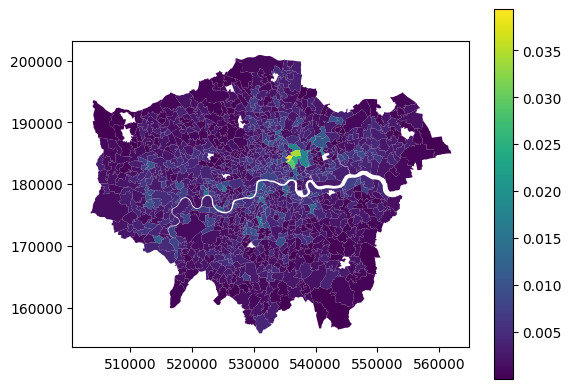

In [64]:
msoa_cycle.plot(
    column = 'cycle_density',
    legend = True
)

plt.show()

<Axes: >

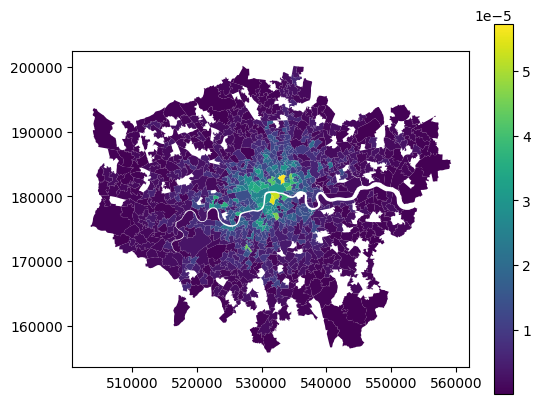

In [93]:
msoa_cycle.plot(
    column = 'casualty_density',
    legend = True
)

In [68]:
# get cycle casualties

casualties = gpd.read_file('data/2022_casualties.gpkg')
cycle_casualties = casualties[casualties['Casualty Mode of Travel'] == 'Pedal Cycle']

In [70]:
# create dataframe
msoa_casualties = msoa.sjoin(cycle_casualties, predicate = 'contains')

In [75]:
# join with msoa table
msoa_cycle = msoa_cycle.merge(msoa_casualties.groupby('MSOA11CD')['_Casualty Count'].sum(), left_on = 'MSOA11CD', right_index = True)

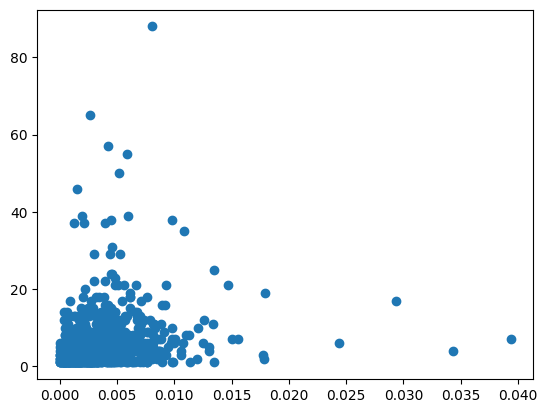

In [77]:
plt.scatter(
    x = msoa_cycle['cycle_density'],
    y = msoa_cycle['_Casualty Count']
)

In [94]:
msoa_cycle_dropna = msoa_cycle.dropna()

# run linear regression
model = sm.OLS(msoa_cycle_dropna['casualty_density'], sm.add_constant(msoa_cycle_dropna['cycle_density']))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       casualty_density   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     46.58
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           1.68e-11
Time:                        14:50:29   Log-Likelihood:                 8645.3
No. Observations:                 842   AIC:                        -1.729e+04
Df Residuals:                     840   BIC:                        -1.728e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.841e-06   4.19e-07     11.543      0.000    4.02e-06    5.66e-06
cycle_density     0.0006   8.56e-05      6.825      0.000       0.000       0.001
==============================================================================
Omnibus:                      392.470   Durbin-Watson:                   1.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1914.455
Skew:                           2.156   Prob(JB):                         0.00
Kurtosis:                       8.998   Cond. No.                         295.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

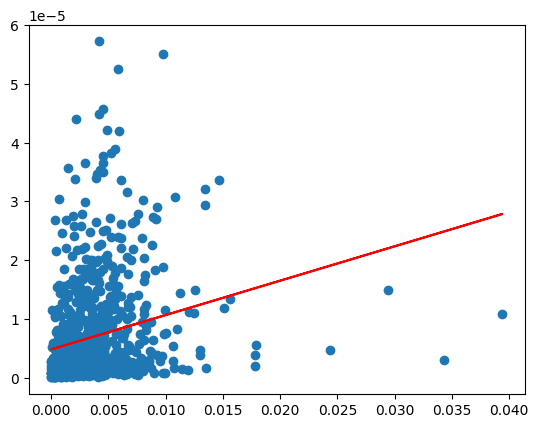

In [95]:
plt.scatter(
    x = msoa_cycle['cycle_density'],
    y = msoa_cycle['casualty_density']
)

plt.plot(
    msoa_cycle_dropna['cycle_density'], results.predict(sm.add_constant(msoa_cycle_dropna['cycle_density'])),
    color = 'red'
)

## Cycling Traffic



In [99]:
# load data

atc_path = os.path.join('data', 'active_travel_counts')
fn = ['2022 W1 spring-Central.csv', '2022 W1 spring-Inner-Part1.csv', '2022 W1 spring-Inner-Part2.csv', '2022 W1 spring-Outer.csv', '2022 W1 spring-Cycleways.csv']

traffic_df = []
for f in fn:
    traffic_df.append(
        pd.read_csv(os.path.join(atc_path,f))
    )



In [100]:
traffic_df[0]

,Year,UnqID,Date,Weather,Time,Day,Round,Dir,Path,Mode,Count
0,2022 W1 spring,ML0001,13/07/2022,Dry,06:00:00,Weekday,A,Northbound,Carriageway,Cargo bikes,0
1,2022 W1 spring,ML0001,13/07/2022,Dry,06:15:00,Weekday,A,Northbound,Carriageway,Cargo bikes,0
2,2022 W1 spring,ML0001,13/07/2022,Dry,06:30:00,Weekday,A,Northbound,Carriageway,Cargo bikes,0
3,2022 W1 spring,ML0001,13/07/2022,Dry,06:45:00,Weekday,A,Northbound,Carriageway,Cargo bikes,0
4,2022 W1 spring,ML0001,13/07/2022,Dry,07:00:00,Weekday,A,Northbound,Carriageway,Cargo bikes,0
...,...,...,...,...,...,...,...,...,...,...,...
370683,2022 W1 spring,ML0104,14/06/2022,Dry,20:45:00,Weekday,A,Southbound,Pavement - Southbound,Pedestrians,87
370684,2022 W1 spring,ML0104,14/06/2022,Dry,21:00:00,Weekday,A,Southbound,Pavement - Southbound,Pedestrians,81
370685,2022 W1 spring,ML0104,14/06/2022,Dry,21:15:00,Weekday,A,Southbound,Pavement - Southbound,Pedestrians,76
370686,2022 W1 spring,ML0104,14/06/2022,Dry,21:30:00,Weekday,A,Southbound,Pavement - Southbound,Pedestrians,63


In [104]:
# load locations
locations = pd.read_csv(os.path.join(atc_path, '1 Monitoring locations.csv'))
locations_gdf = gpd.GeoDataFrame(
    locations,
    geometry = gpd.points_from_xy(locations['Easting (UK Grid)'], locations['Northing (UK Grid)'], crs = 'EPSG:27700')
)

In [105]:
locations_gdf

,Site ID,Location description,Borough,Functional area for monitoring,Road type,Is it on the strategic CIO panel?,Old site ID (legacy),Easting (UK Grid),Northing (UK Grid),Latitude,Longitude,geometry
0,ML0001,Millbank (south of Thorney Street),Westminster,01 Central,01 A Road,1,CENCY001,530251.49,178742.45,51.492628,-0.125204,POINT (530251.490 178742.450)
1,ML0002,Bishopsgate,City of London,01 Central,01 A Road,1,CENCY002,533362.68,181824.45,51.519599,-0.079254,POINT (533362.680 181824.450)
2,ML0003,Southwark Bridge,Southwark,01 Central,01 A Road,1,CENCY003,532334.06,180520.37,51.508123,-0.094551,POINT (532334.060 180520.370)
3,ML0004,Southwark Bridge Road,Southwark,01 Central,01 A Road,1,CENCY004,532052.50,179677.64,51.500613,-0.098927,POINT (532052.500 179677.640)
4,ML0005,Tooley Street,Southwark,01 Central,01 A Road,1,CENCY005,533031.59,180213.46,51.505200,-0.084629,POINT (533031.590 180213.460)
...,...,...,...,...,...,...,...,...,...,...,...,...
2167,ML2169,Lambeth Bridge roundabout entry (C) Millbank (...,Westminster,01 Central,0,0,Lambeth 2,530243.00,178945.00,51.494457,-0.125248,POINT (530243.000 178945.000)
2168,ML2170,Lambeth Bridge roundabout entry (D) Lambeth Pa...,Lambeth,01 Central,0,0,Lambeth 4,530555.00,178983.00,51.494727,-0.120742,POINT (530555.000 178983.000)
2169,ML2171,Lambeth Bridge roundabout entry (E) Lambeth Road,Lambeth,01 Central,0,0,Lambeth 5,530592.00,178938.00,51.494307,-0.120222,POINT (530592.000 178938.000)
2170,ML2172,Lambeth Bridge roundabout entry (F) Albert Emb...,Lambeth,01 Central,0,0,Lambeth 6,530532.00,178902.00,51.494003,-0.121104,POINT (530532.000 178902.000)
